Importing Libraries

In [1]:
! pip install langdetect
import numpy as np
import pandas as pd 
import glob
import csv
import seaborn as sns
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Loading Data

In [2]:
import sys

csv.field_size_limit(sys.maxsize)

df = pd.read_csv("dataCleaned.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34292 entries, 0 to 34291
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            34292 non-null  object 
 1   date               34292 non-null  object 
 2   price              20772 non-null  float64
 3   productAsin        34292 non-null  object 
 4   ratingScore        34292 non-null  int64  
 5   reviewCategoryUrl  34292 non-null  object 
 6    Review            34228 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.8+ MB


In [8]:
df_recent['price'].describe()
# Find rows where the 'price' column is null (or NaN)
empty_price_rows = df_recent[df_recent['price'].isna()]

# Display the rows with empty 'price'
print(empty_price_rows)

num_empty_price_rows = len(empty_price_rows)
print(f"Number of rows with empty price: {num_empty_price_rows}")

             country       date  price productAsin  ratingScore  \
13838  United States 2019-01-01    NaN  B07BDFW1Y7            4   
13147  United States 2019-01-04    NaN  B01HSEZK78            2   
20170  United States 2019-01-04    NaN  B07DCP4496            5   
20389  United States 2019-01-04    NaN  B079LYTGTX            5   
20973  United States 2019-01-04    NaN  B07DCP4496            1   
...              ...        ...    ...         ...          ...   
27200  United States 2023-11-08    NaN  B09X34NWP5            5   
4334   United States 2023-11-08    NaN  B09X34NWP5            5   
28901  United States 2023-11-09    NaN  B06Y3PGPR2            2   
29319  United States 2023-11-09    NaN  B01HTYUPO0            3   
28286  United States 2023-11-09    NaN  B01HTYUPO0            3   

                                       reviewCategoryUrl  \
13838  https://www.amazon.com/product-reviews/B07BDFW...   
13147  https://www.amazon.com/product-reviews/B01HSEZ...   
20170  https://

In [9]:

# Group by 'asin' and forward-fill the missing values in 'price' within each group
df_recent['price'] = df_recent.groupby('productAsin')['price'].transform(lambda x: x.ffill().bfill())
# Find rows where the 'price' column is null (or NaN)
empty_price_rows_new = df_recent[df_recent['price'].isna()]

# Display the rows with empty 'price'
print(empty_price_rows_new)

num_empty_price_rows_new = len(empty_price_rows_new)
print(f"Number of rows with empty price: {num_empty_price_rows_new}")


             country       date  price productAsin  ratingScore  \
13147  United States 2019-01-04    NaN  B01HSEZK78            2   
18459  United States 2019-01-06    NaN  B002LK1YNO            5   
14114  United States 2019-01-07    NaN  B00GBVH1WM            1   
15300  United States 2019-01-09    NaN  B07GNDDNMW            1   
13269  United States 2019-01-11    NaN  B016OIEXE0            5   
...              ...        ...    ...         ...          ...   
17382  United States 2023-11-06    NaN  B07GNDDNMW            5   
16231  United States 2023-11-06    NaN  B08PBP21RW            5   
16004  United States 2023-11-06    NaN  B0C39YYTLG            4   
16227  United States 2023-11-06    NaN  B08PBP21RW            5   
17324  United States 2023-11-07    NaN  B07GNDDNMW            5   

                                       reviewCategoryUrl  \
13147  https://www.amazon.com/product-reviews/B01HSEZ...   
18459  https://www.amazon.com/product-reviews/B002LK1...   
14114  https://

/var/folders/93/3b9c3jqj437b2wvkws68jplw0000gn/T/ipykernel_52913/3255221222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['price'] = df_recent.groupby('productAsin')['price'].transform(lambda x: x.ffill().bfill())


In [11]:
# Check if there are any duplicate 'asin' values in these rows
duplicate_asins = empty_price_rows_new.duplicated('productAsin', keep=False)

# Count the number of rows with duplicate 'productAsin'
num_duplicate_asins = duplicate_asins.sum()

print(f"Number of rows with missing 'price' and duplicate 'productAsin': {num_duplicate_asins}")

# Filter to only include rows with duplicate 'productAsin'
duplicates = empty_price_rows_new[duplicate_asins]

# Get the unique 'productAsin' values that have duplicates
unique_duplicate_asins = duplicates['productAsin'].unique()

print(unique_duplicate_asins)

#add the price of the product to the empty price rows according to the productAsin

# Dictionary of ASINs and their corresponding prices you want to set
asin_to_price = {
    'B01HSEZK78': 879.0,
    'B002LK1YNO': 911.0,
    'B00GBVH1WM': 1039.0,
    'B07GNDDNMW': 189.99,
    'B016OIEXE0': 1424.0,
    'B0141G9IHY': 1424.0,
    "B016OIF47U": 1139.2,
    'B01N9QMA84': 1500.0,
    'B07NVBQP7V': 749.0,
    'B07SD9H4WP': 369.0,
    'B08PBP21RW': 329.5,
    'B01F7B225W': 1103.2,
    'B099MKVR9T': 1115.0,
    'B09CLP7ZDT': 483.3, 
    'B0BCJPTFW3': 239.99,
    'B09BB1XYGH': 299.99,
    'B0C39YYTLG': 259.99, 
    'B09XQMSGLK': 659.0
    
}

# Update the DataFrame
for asin, price in asin_to_price.items():
    df_recent.loc[df['productAsin'] == asin, 'price'] = price

# Find rows where the 'price' column is null (or NaN)
empty_price_rows_3 = df_recent[df_recent['price'].isna()]

# Display the rows with empty 'price'
print(empty_price_rows_3)

num_empty_price_rows_3= len(empty_price_rows_3)
print(f"Number of rows with empty price: {num_empty_price_rows_3}")



Number of rows with missing 'price' and duplicate 'productAsin': 3736
['B01HSEZK78' 'B002LK1YNO' 'B00GBVH1WM' 'B07GNDDNMW' 'B016OIEXE0'
 'B0141G9IHY' 'B016OIF47U' 'B01N9QMA84' 'B07NVBQP7V' 'B07SD9H4WP'
 'B08PBP21RW' 'B01F7B225W' 'B099MKVR9T' 'B09CLP7ZDT' 'B0BCJPTFW3'
 'B09BB1XYGH' 'B0C39YYTLG' 'B09XQMSGLK']
Empty DataFrame
Columns: [country, date, price, productAsin, ratingScore, reviewCategoryUrl,  Review]
Index: []
Number of rows with empty price: 0


In [17]:
# Drop duplicates in the 'Review' column
# keep='first' will keep the first occurrence and drop the rest

df_recent.drop_duplicates(subset=' Review', keep='first', inplace=True)
df_recent.to_csv('amaon_US_after2019_with_price.csv', index=False)
df_recent

/var/folders/93/3b9c3jqj437b2wvkws68jplw0000gn/T/ipykernel_52913/3224195399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent.drop_duplicates(subset=' Review', keep='first', inplace=True)


,country,date,price,productAsin,ratingScore,reviewCategoryUrl,Review
8814,United States,2019-01-01,229.99,B07BDFW1Y7,4,https://www.amazon.com/product-reviews/B07BDFW...,Firm chair Very good support. Not a soft cush...
33173,United States,2019-01-04,589.00,B07DCP4496,5,https://www.amazon.com/product-reviews/B07DCP4...,It is the chair you seek After owning a real l...
13147,United States,2019-01-04,879.00,B01HSEZK78,2,https://www.amazon.com/product-reviews/B01HSEZ...,"For the price, not so much. I bought this one ..."
22825,United States,2019-01-04,589.00,B07DCP4496,1,https://www.amazon.com/product-reviews/B07DCP4...,What a joke! The Hero? More like Zero!!! Soft...
20389,United States,2019-01-04,523.77,B079LYTGTX,5,https://www.amazon.com/product-reviews/B079LYT...,Awesome chair so far Very easy to assemble. B...
...,...,...,...,...,...,...,...
488,United States,2023-11-08,359.99,B0C3T865C2,5,https://www.amazon.com/product-reviews/B0C3T86...,Worth every penny Will this ever be a Herman M...
8790,United States,2023-11-09,399.00,B06Y3PGPR2,2,https://www.amazon.com/product-reviews/B06Y3PG...,Hard to assemble pieces don't fit together Rea...
29319,United States,2023-11-09,1349.00,B01HTYUPO0,3,https://www.amazon.com/product-reviews/B01HTYU...,Use Caution when leaning forward ! On 3 occasi...
30907,United States,2023-11-09,419.00,B083FBN9BH,5,https://www.amazon.com/product-reviews/B083FBN...,The best chair This was simply the easiest cha...


In [18]:
df.drop_duplicates(subset=' Review', keep='first', inplace=True)
df.to_csv('amaon_US_no_duplicate_with_price(withOldTimereview).csv', index=False)
df

,country,date,price,productAsin,ratingScore,reviewCategoryUrl,Review
27112,United States,2006-03-25,694.00,B0195AKAEG,1,https://www.amazon.com/product-reviews/B0195AK...,Big Farce These chairs lack one major adjustme...
26850,United States,2007-04-27,694.00,B0195AKAEG,3,https://www.amazon.com/product-reviews/B0195AK...,Nice chair but two problems. I have been using...
8299,United States,2007-06-24,NaN,B0195AKAEG,4,https://www.amazon.com/product-reviews/B0195AK...,Correcting Aeron leg circulation problems I ha...
27476,United States,2007-06-27,1039.20,B006H1QYBA,2,https://www.amazon.com/product-reviews/B006H1Q...,Good Chair. Not great - especially considering...
14099,United States,2007-12-02,NaN,B002LK1YNO,2,https://www.amazon.com/product-reviews/B002LK1...,Mixed bag I have mixed feelings about this cha...
...,...,...,...,...,...,...,...
488,United States,2023-11-08,359.99,B0C3T865C2,5,https://www.amazon.com/product-reviews/B0C3T86...,Worth every penny Will this ever be a Herman M...
8790,United States,2023-11-09,399.00,B06Y3PGPR2,2,https://www.amazon.com/product-reviews/B06Y3PG...,Hard to assemble pieces don't fit together Rea...
29319,United States,2023-11-09,NaN,B01HTYUPO0,3,https://www.amazon.com/product-reviews/B01HTYU...,Use Caution when leaning forward ! On 3 occasi...
30907,United States,2023-11-09,419.00,B083FBN9BH,5,https://www.amazon.com/product-reviews/B083FBN...,The best chair This was simply the easiest cha...


<AxesSubplot:title={'center':'Number of Review Published Each Month'}, xlabel='date'>

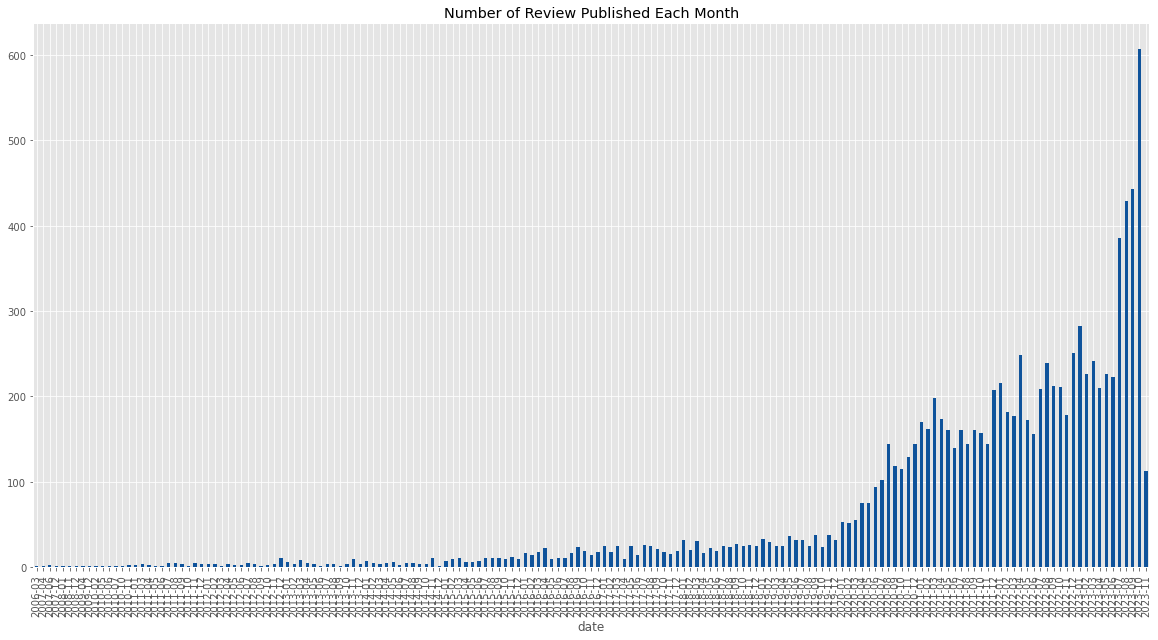

In [19]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort values by publish_time
df = df.sort_values(by='date')
df.head()

# plot graph of number of reviews for each month 
number_of_articles = df.groupby(df['date'].dt.to_period('M')).size()
number_of_articles.plot(kind='bar', figsize=(20, 10), color='#0F539B', title='Number of Review Published Each Month')



In [20]:
count = df[df['date'].dt.year <= 2019].shape[0]
print(count)


1377


<AxesSubplot:title={'center':'Number of Review Published Each Month'}, xlabel='date'>

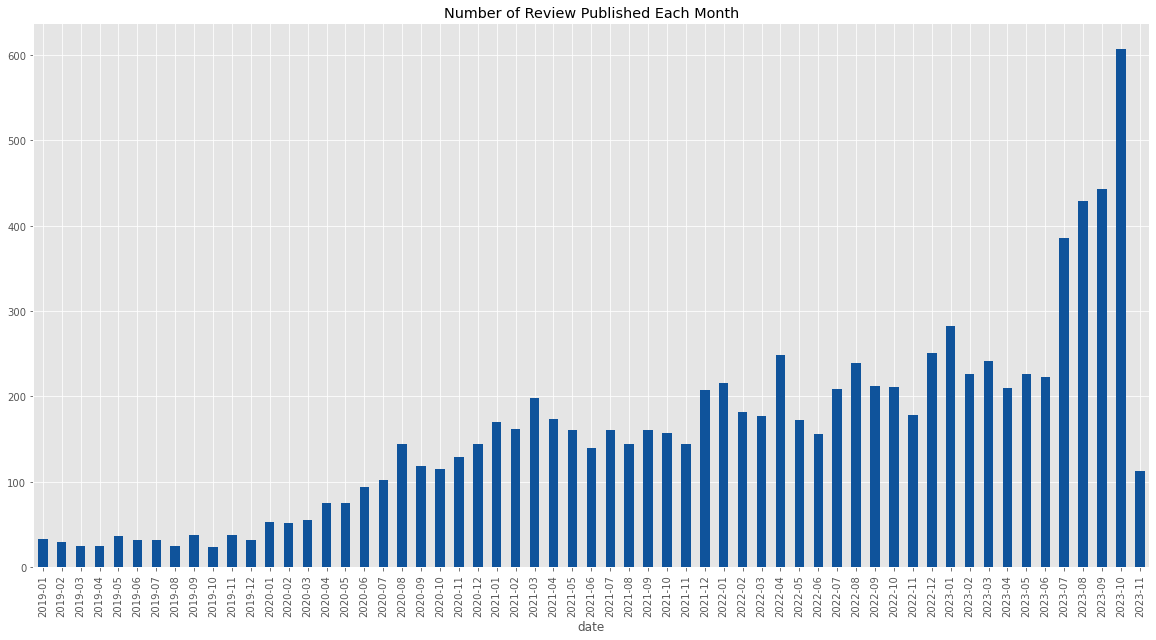

In [23]:
# Remove all articles published before 2019 November 
df_new = df[df['date'].dt.year >= 2019]
df_new.head()

# plot graph of number of reviews for each month from 2019 to 2023
number_of_review = df_recent.groupby(df_new['date'].dt.to_period('M')).size()
number_of_review.plot(kind='bar', figsize=(20, 10), color='#0F539B', title='Number of Review Published Each Month')


In [8]:
# take 20,000 random sample from df and save it as csv
df_20000 = df_recent.sample(n=20000, random_state=42)
df_20000.to_csv('df_20000.csv', index=False)

# take 15,000 random sample from df and save it as csv
df_15000 = df_recent.sample(n=15000, random_state=42)
df_15000.to_csv('df_15000.csv', index=False)

# take 10,000 random sample from df and save it as csv
df_10000 = df_recent.sample(n=10000, random_state=42)
df_10000.to_csv('df_10000.csv', index=False)

Analysis About Words in Data

In [24]:
def word_count(text):
    return len(str(text).split(' '))

In [25]:
df_recent['word_count'] = df_recent[' Review'].apply(word_count)
df_recent['word_count'].describe()

/var/folders/93/3b9c3jqj437b2wvkws68jplw0000gn/T/ipykernel_52913/4119139187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['word_count'] = df_recent[' Review'].apply(word_count)


count    9336.000000
mean      104.482541
std       111.041037
min         2.000000
25%        36.000000
50%        70.000000
75%       132.000000
max      1463.000000
Name: word_count, dtype: float64

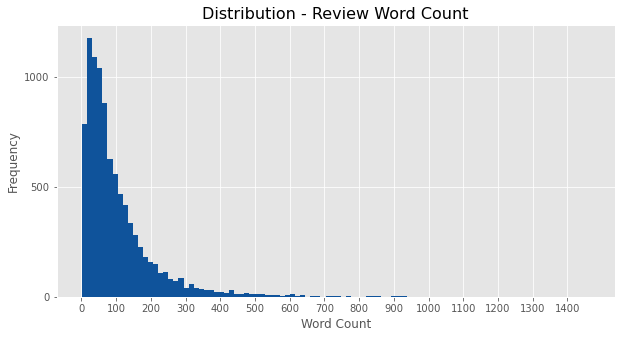

In [27]:
fig = plt.figure(figsize=(10,5))

plt.hist(
    df_recent['word_count'],    # list of word counts
    bins=100,
    color='#0F539B'
)

plt.title('Distribution - Review Word Count', fontsize=16)
plt.ylabel('Frequency')
plt.xlabel('Word Count')
plt.yticks(np.arange(0, 1500, 500))
plt.xticks(np.arange(0, 1500, 100))

file_name = 'hist'

plt.show()

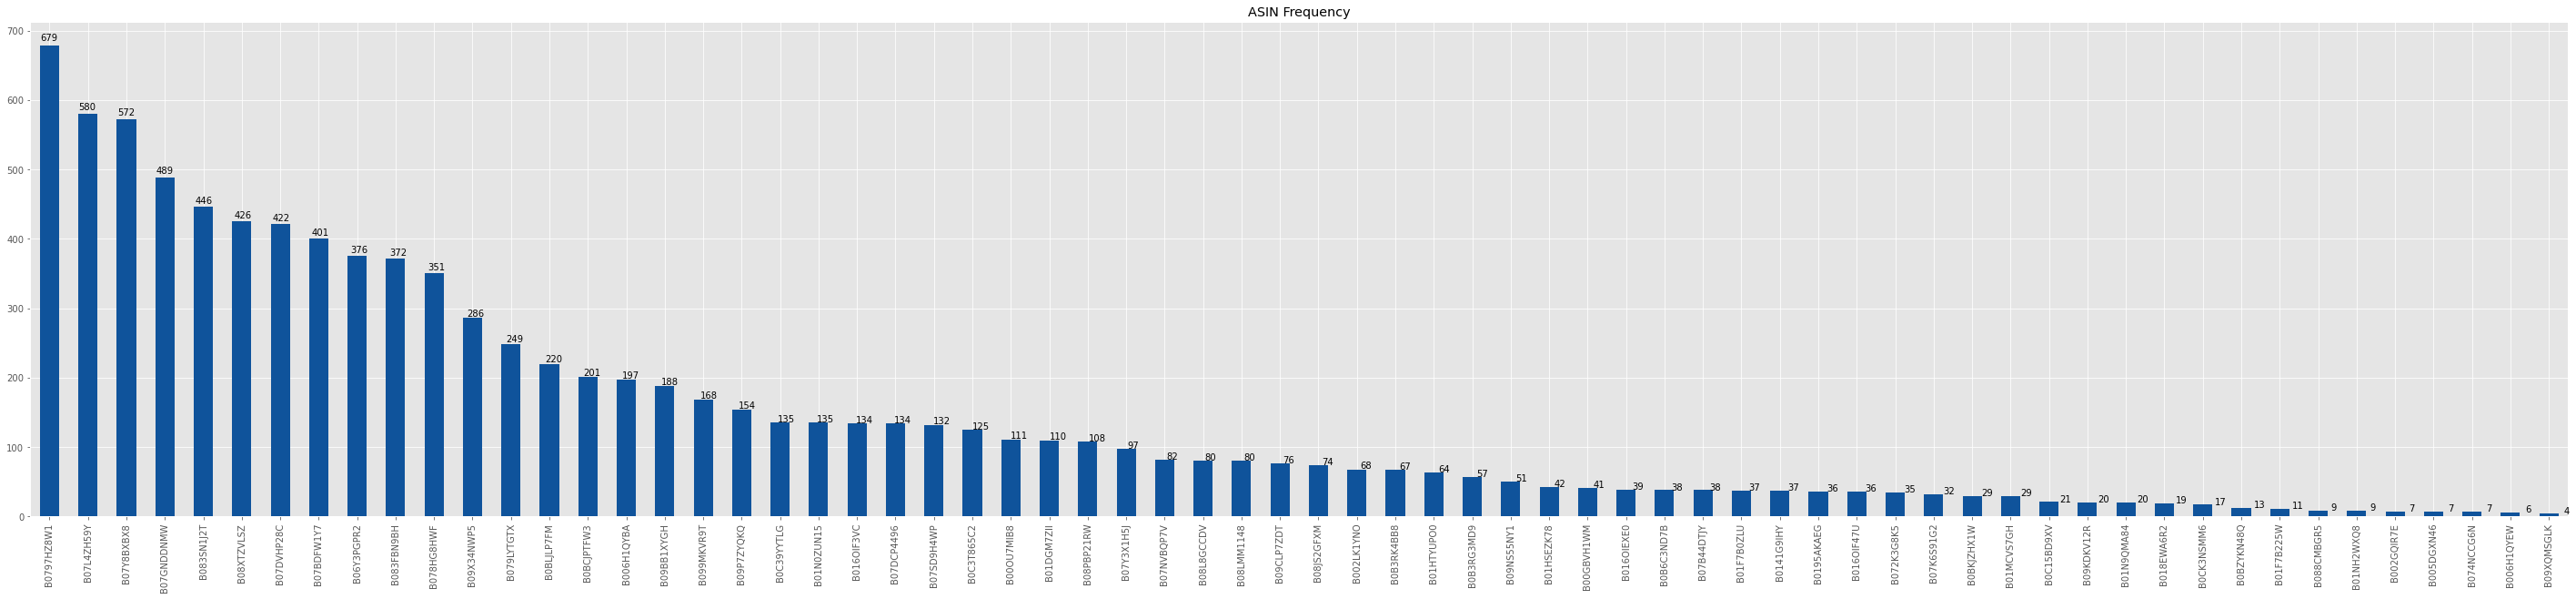

In [28]:
asins_count = df_recent["productAsin"].value_counts().index
fig = plt.figure(figsize=(50,10))
ax = df_recent["productAsin"].value_counts().plot(kind="bar", color='#0F539B', title="ASIN Frequency")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=90)
plt.show()

In [29]:
df_recent["ratingScore"].mean()

3.494751499571551

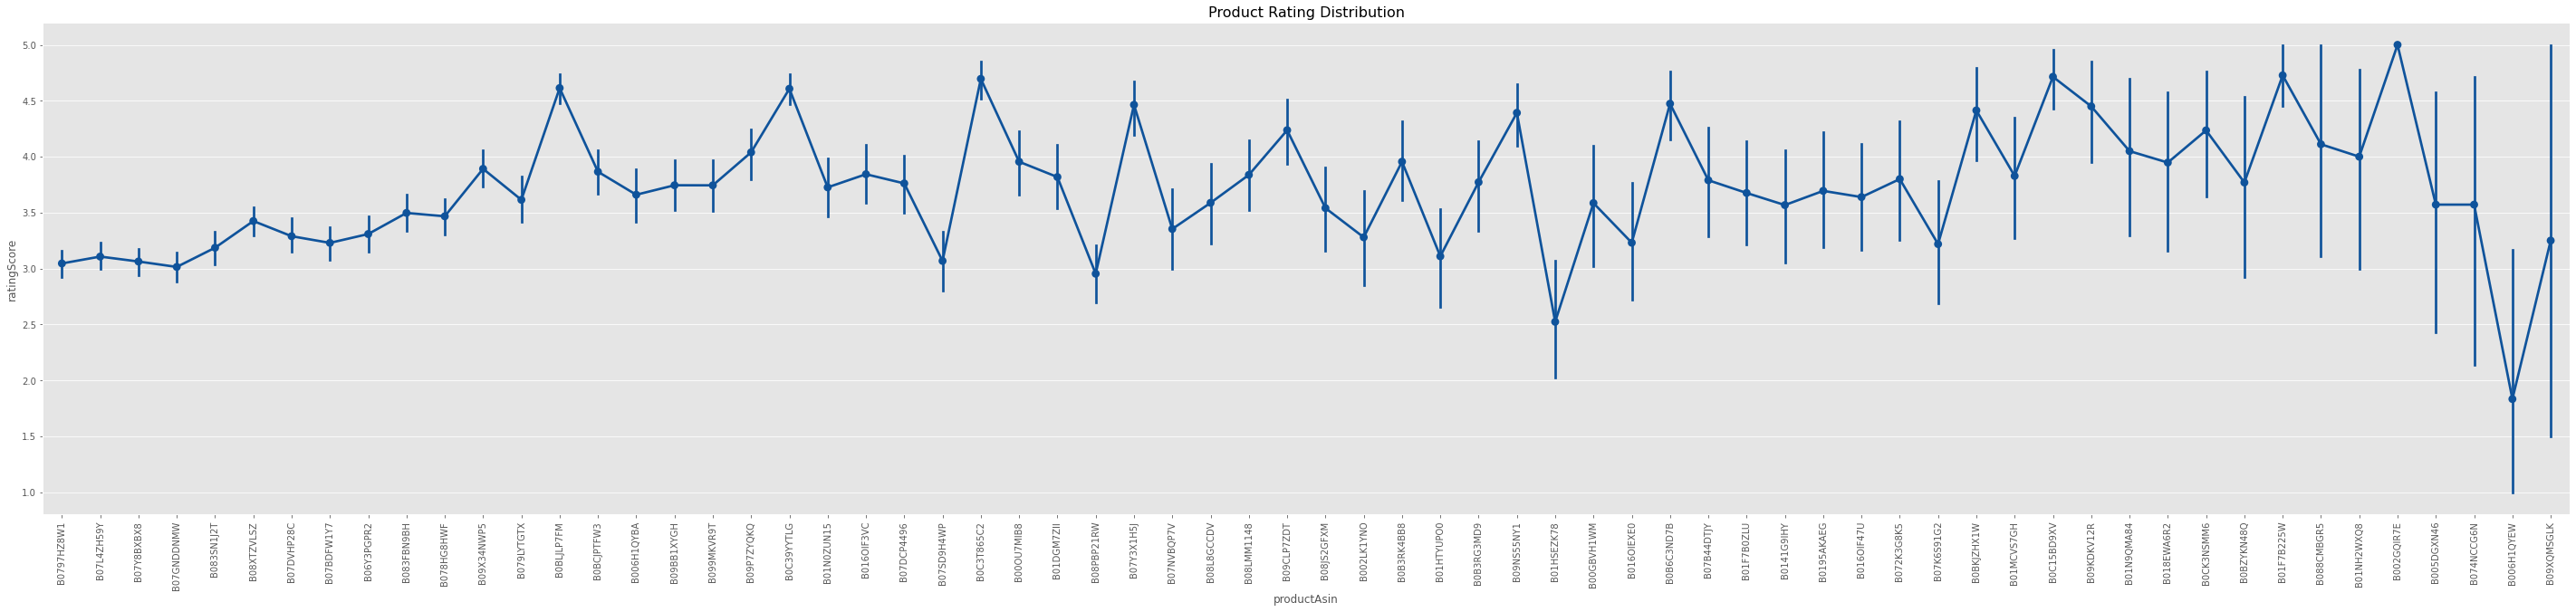

In [30]:
'''
def plot_rating(df, title):
    fig = plt.figure(figsize=(10,5))

    plt.hist(
        df_recent['ratingScore'],
        bins=5,
        color='#0F539B'
    )

    plt.title(title, fontsize=16)
    plt.ylabel('Product Asin')
    plt.xlabel('Rating Score')
    plt.yticks(np.arange(0, 5000, 500))
    plt.xticks(np.arange(0, 6, 1))

    file_name = 'hist'

    plt.show()
 '''   
fig = plt.figure(figsize=(50,10))
sns.pointplot(x="productAsin", y="ratingScore", order=asins_count, data=df_recent, color='#0F539B')
plt.title('Product Rating Distribution', fontsize=16)
plt.xticks(rotation=90)
plt.show()

/var/folders/93/3b9c3jqj437b2wvkws68jplw0000gn/T/ipykernel_52913/2055637543.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['asin_num'] = df_recent['productAsin'].map(asin_to_num)


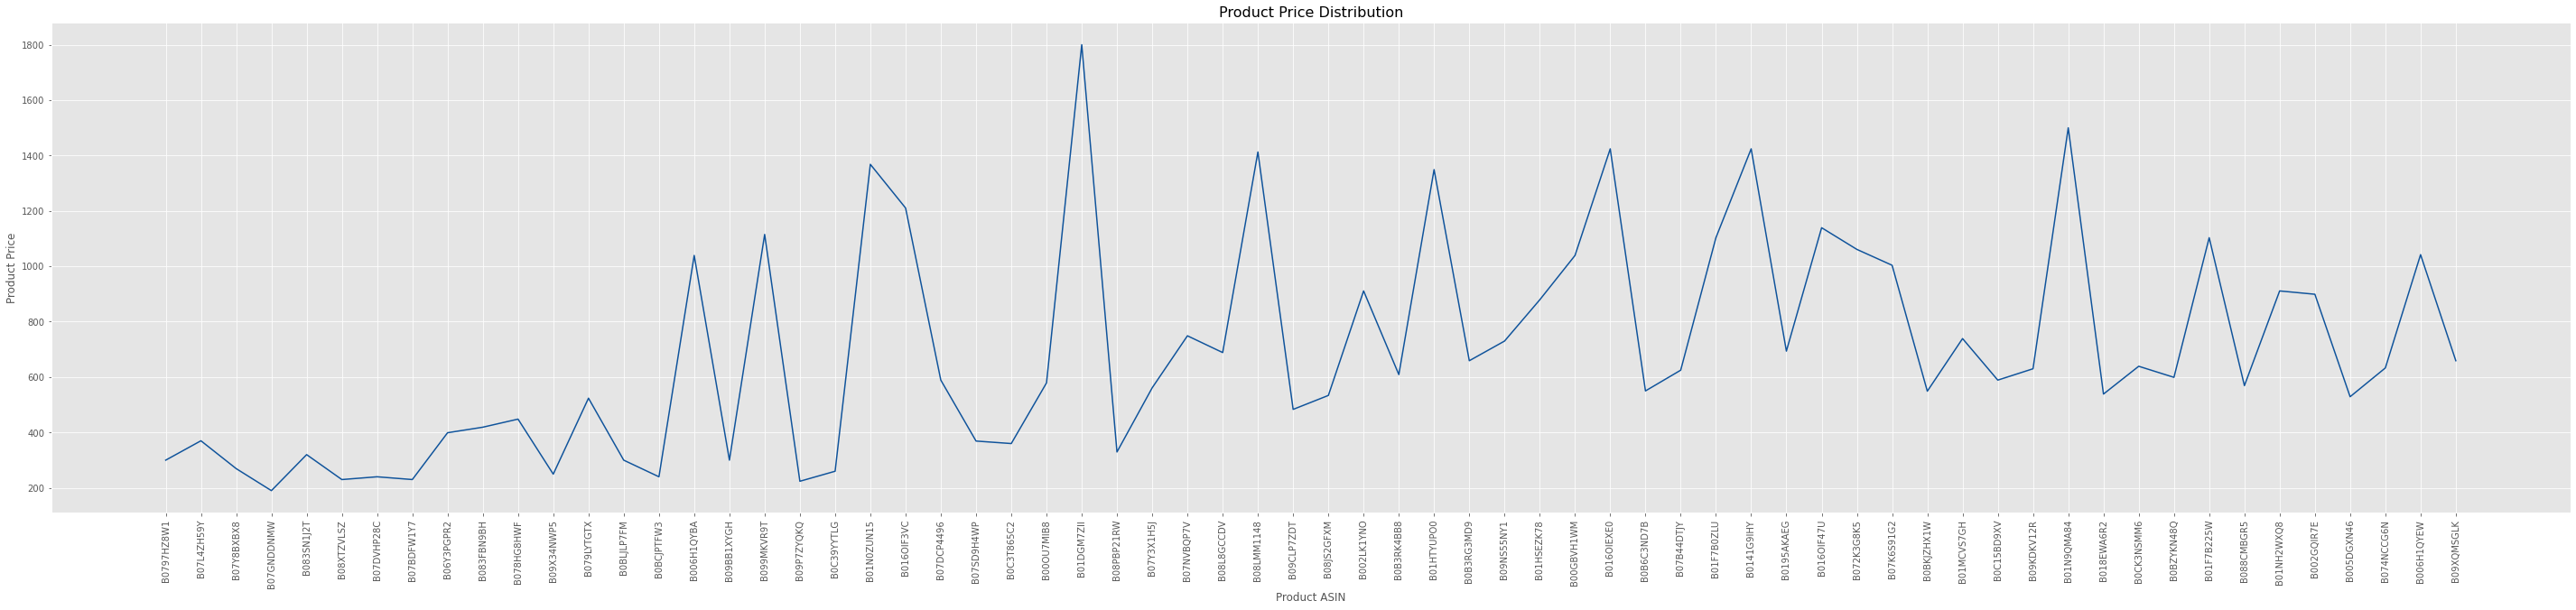

In [31]:


# Assuming 'df' is your DataFrame and 'order' contains the ordered list of product ASINs
# Mapping product ASINs to numerical values for plotting
asin_to_num = {asin: i for i, asin in enumerate(asins_count)}
num_to_asin = {i: asin for i, asin in enumerate(asins_count)}

# Creating a new column in the DataFrame for the numerical x-axis
df_recent['asin_num'] = df_recent['productAsin'].map(asin_to_num)

# Aggregating the data (if necessary, e.g., getting average price per product ASIN)
# This depends on how you want to represent multiple prices per ASIN
grouped_data = df_recent.groupby('asin_num')['price'].mean()

# Creating the plot
plt.figure(figsize=(50, 10))
plt.plot(grouped_data.index, grouped_data.values, color='#0F539B')  # Plotting the line

# Adjusting the x-axis to show product ASINs instead of numbers
plt.xticks(ticks=grouped_data.index, labels=[num_to_asin[x] for x in grouped_data.index], rotation=90)

# Setting the plot title and labels
plt.title('Product Price Distribution', fontsize=16)
plt.xlabel('Product ASIN')
plt.ylabel('Product Price')

# Displaying the plot
plt.show()


/var/folders/93/3b9c3jqj437b2wvkws68jplw0000gn/T/ipykernel_52913/839194682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['price_range'] = pd.cut(df_recent['price'], bins=bins, labels=labels)


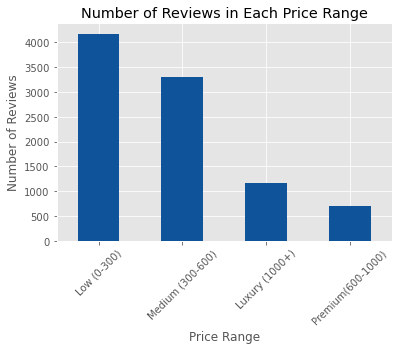

count    9336.000000
mean      473.072713
std       339.214938
min       170.630000
25%       249.500000
50%       329.500000
75%       523.770000
max      1799.990000
Name: price, dtype: float64

In [32]:
# Define the price bins
bins = [0, 300, 600, 1000, float('inf')]  # Adjust the ranges as needed
labels = ['Low (0-300)', 'Medium (300-600)', 'Premium(600-1000)', 'Luxury (1000+)']

# Categorize the prices into the defined bins
df_recent['price_range'] = pd.cut(df_recent['price'], bins=bins, labels=labels)

# Count the number of reviews in each price range
review_counts = df_recent['price_range'].value_counts()

# Plotting
review_counts.plot(kind='bar', color='#0F539B')
plt.xlabel('Price Range')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Each Price Range')
plt.xticks(rotation=45)
plt.show()
df_recent['price'].describe()

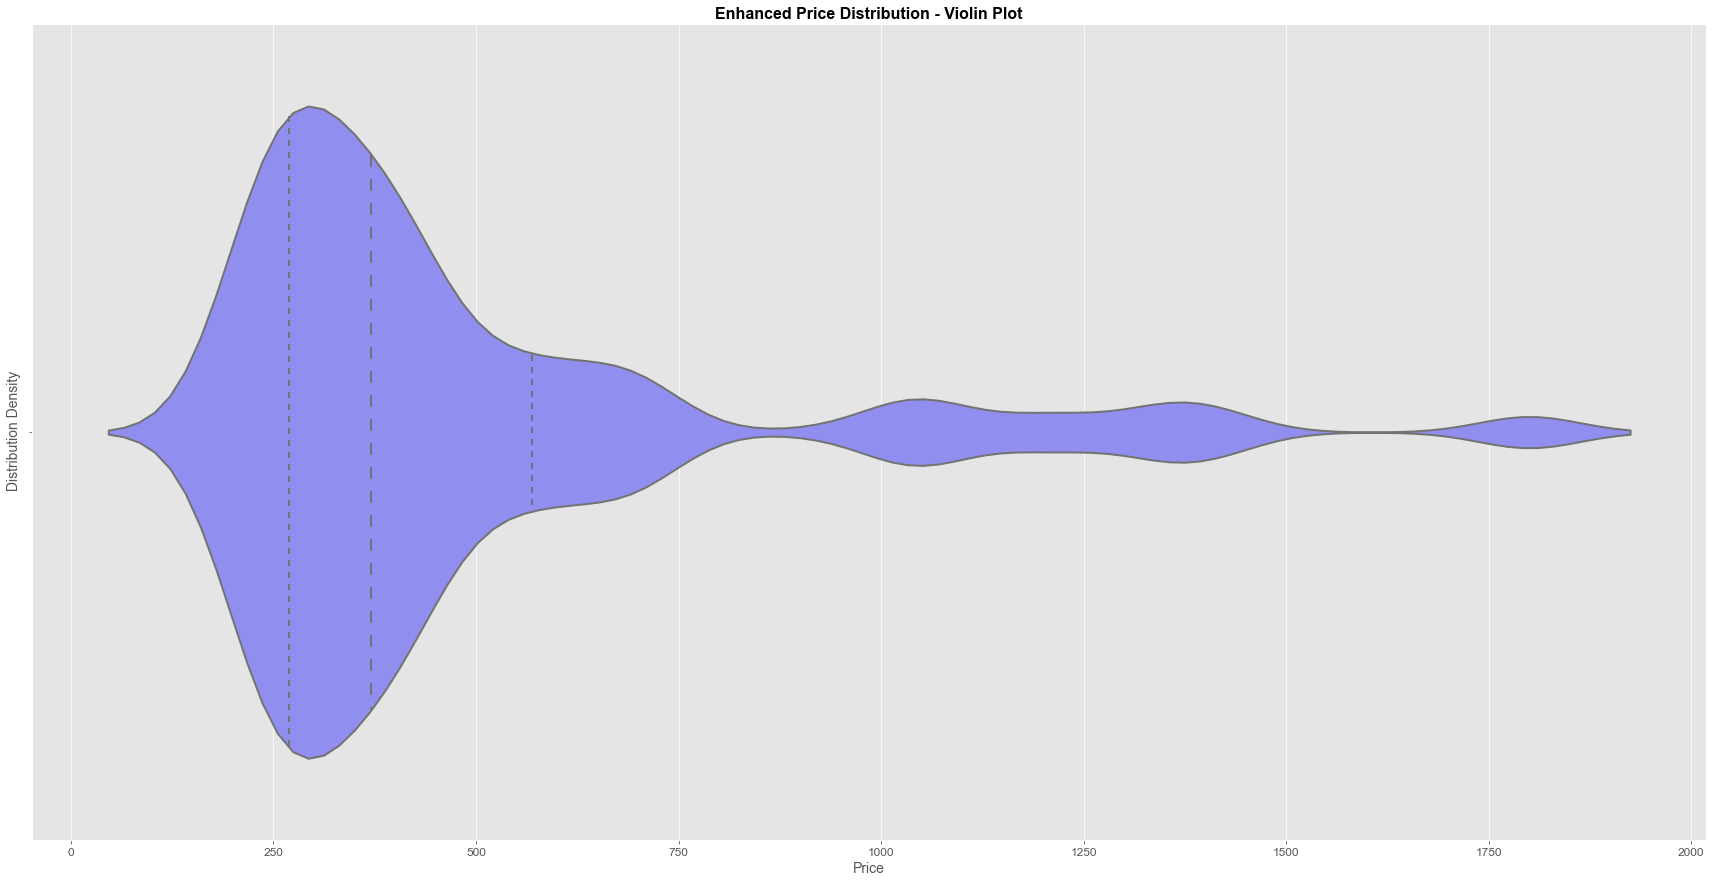

In [33]:
plt.figure(figsize=(30, 15))  # Set the size of the plot

# Create a violin plot with additional customizations
sns.violinplot(x='price', data=df, inner='quartile',  # Show quartiles
               palette='cool',  # Use a cool color palette
               scale='count',  # Scale by the number of observations
               color='#0F539B',
               linewidth=2)  # Thicker line for the violin border

# Customize the plot appearance
sns.set(style='whitegrid')  # Set a white grid background
plt.title('Enhanced Price Distribution - Violin Plot', fontsize=16, fontweight='bold', )
plt.xlabel('Price', fontsize=14)
plt.ylabel(' Distribution Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()



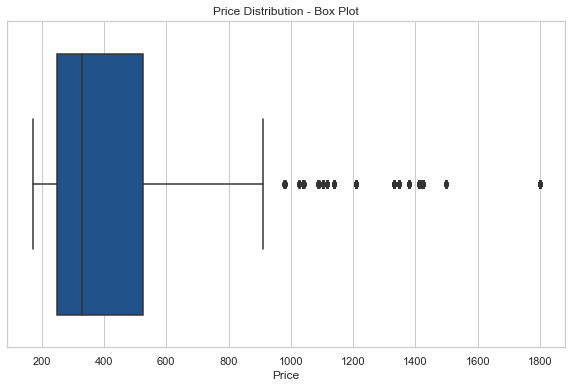

In [34]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(x=df_recent['price'], color='#0F539B')

plt.title('Price Distribution - Box Plot')
plt.xlabel('Price')
plt.show()


In [42]:

# Check if there are any NaN values in the DataFrame
has_missing_values = df_recent.isna().any().any()

print(f"Are there any missing values in the DataFrame? {has_missing_values}")


Are there any missing values in the DataFrame? False


[nltk_data] Downloading package omw-1.4 to /Users/faye/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/faye/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{'she', 'because', 'yourselves', 'm', 're', 'is', 'isn', "mightn't", 'you', 'over', 'had', 'a', "needn't", 'if', 'by', 'out', 'both', 'very', 'what', 'where', 'in', 'doesn', 'at', 'while', 'were', 'didn', 'i', 'being', 'don', "you'd", 'an', 'that', 'not', 'has', 'was', "you've", 'my', 'myself', 'after', "doesn't", 'aren', 'during', 'but', 'before', 'more', 'them', 'have', 'should', 'y', "didn't", 'her', 'off', 'into', 'through', "weren't", "should've", "shan't", 'its', 'which', 'other', 'me', 'themselves', 'now', "you'll", 'whom', 'until', 'own', 'shouldn', 'we', 'he', "it's", 'doing', "you're", 'did', 'this', 'up', 'nor', "hasn't", "haven't", 'hers', 'here', "isn't", 'theirs', 'ours', 'from', 'our', 'on', 'to', 'him', 'these', "mustn't", "won't", 'most', 't', 'each', 'above', 'shan', 'haven', 'himself', 'such', 'does', 'herself', 'down', 'same', "shouldn't", 'will', 'it', 'how', 'so', 'against', 'some', 'and', 'just', 'mightn', "couldn't", 'there', 'those', "don't", 'couldn', 'ourselv

[nltk_data] Downloading package stopwords to /Users/faye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'set' object has no attribute 'append'